# CNN Model

In [1]:
import pandas as pd
import numpy as np

In [2]:
import yfinance as yf

ticker_symbol = 'TCEHY'

tencent_data = yf.download(ticker_symbol, start='2013-01-01', end='2023-01-01')

print(tencent_data.head())

[*********************100%%**********************]  1 of 1 completed

             Open   High    Low  Close  Adj Close  Volume
Date                                                     
2013-01-02  6.674  6.730  6.672  6.720   6.117362  362500
2013-01-03  6.734  6.734  6.660  6.660   6.062743  355000
2013-01-04  6.658  6.742  6.652  6.694   6.093696  101000
2013-01-07  6.590  6.600  6.556  6.600   6.008125   83000
2013-01-08  6.592  6.592  6.540  6.570   5.980815   49000


In [3]:
tencent_data.reset_index(inplace=True)

print(tencent_data.head())

        Date   Open   High    Low  Close  Adj Close  Volume
0 2013-01-02  6.674  6.730  6.672  6.720   6.117362  362500
1 2013-01-03  6.734  6.734  6.660  6.660   6.062743  355000
2 2013-01-04  6.658  6.742  6.652  6.694   6.093696  101000
3 2013-01-07  6.590  6.600  6.556  6.600   6.008125   83000
4 2013-01-08  6.592  6.592  6.540  6.570   5.980815   49000


In [4]:
tencent_data['Date'] = pd.to_datetime(tencent_data['Date'])
tencent_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,6.674000,6.730000,6.672000,6.720000,6.117362,362500
1,2013-01-03,6.734000,6.734000,6.660000,6.660000,6.062743,355000
2,2013-01-04,6.658000,6.742000,6.652000,6.694000,6.093696,101000
3,2013-01-07,6.590000,6.600000,6.556000,6.600000,6.008125,83000
4,2013-01-08,6.592000,6.592000,6.540000,6.570000,5.980815,49000
...,...,...,...,...,...,...,...
2513,2022-12-23,40.689999,40.880001,40.049999,40.259998,37.634697,1836800
2514,2022-12-27,40.130001,42.169998,40.000000,41.830002,39.102325,4433500
2515,2022-12-28,41.779999,42.349998,40.770000,41.070000,38.391884,5272400
2516,2022-12-29,43.070000,43.619999,42.759998,43.290001,40.467117,4546700


In [5]:
date_range_start = '2013-01-01'
date_range_end = '2023-01-01'
full_date_range = pd.date_range(start=date_range_start, end=date_range_end)
date_range_df = pd.DataFrame(full_date_range, columns=['Date'])
tencent_merged = pd.merge(date_range_df, tencent_data, on='Date', how='left')
tencent_merged

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-02,6.674000,6.730000,6.672000,6.720000,6.117362,362500.0
2,2013-01-03,6.734000,6.734000,6.660000,6.660000,6.062743,355000.0
3,2013-01-04,6.658000,6.742000,6.652000,6.694000,6.093696,101000.0
4,2013-01-05,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3648,2022-12-28,41.779999,42.349998,40.770000,41.070000,38.391884,5272400.0
3649,2022-12-29,43.070000,43.619999,42.759998,43.290001,40.467117,4546700.0
3650,2022-12-30,42.040001,42.919998,42.040001,42.360001,39.597763,1505500.0
3651,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
financial_metrics = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
for metric in financial_metrics:
    tencent_merged[metric].interpolate(method='linear', inplace=True)

tencent_merged.bfill(inplace=True)
tencent_merged

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,6.674000,6.730000,6.672000,6.720000,6.117362,362500.0
1,2013-01-02,6.674000,6.730000,6.672000,6.720000,6.117362,362500.0
2,2013-01-03,6.734000,6.734000,6.660000,6.660000,6.062743,355000.0
3,2013-01-04,6.658000,6.742000,6.652000,6.694000,6.093696,101000.0
4,2013-01-05,6.635333,6.694667,6.620000,6.662666,6.065172,95000.0
...,...,...,...,...,...,...,...
3648,2022-12-28,41.779999,42.349998,40.770000,41.070000,38.391884,5272400.0
3649,2022-12-29,43.070000,43.619999,42.759998,43.290001,40.467117,4546700.0
3650,2022-12-30,42.040001,42.919998,42.040001,42.360001,39.597763,1505500.0
3651,2022-12-31,42.040001,42.919998,42.040001,42.360001,39.597763,1505500.0


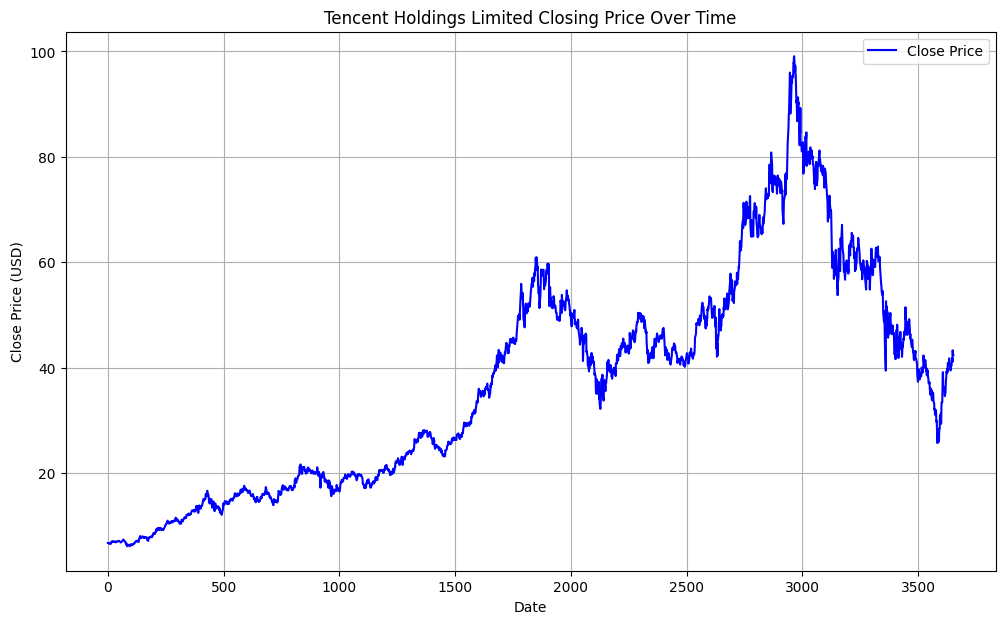

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 7))
plt.plot(tencent_merged['Close'], label='Close Price', color='blue')
plt.title('Tencent Holdings Limited Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid()
plt.show()

In [8]:
# # Calculate Turnover
# tencent_merged['Turnover'] = (tencent_merged['High'] + tencent_merged['Low']) / 2 * tencent_merged['Volume']

# Calculate Daily Change and Percentage Change
tencent_merged['Ups and downs'] = tencent_merged['Close'].diff()
tencent_merged['Percentage Change'] = tencent_merged['Close'].pct_change()
# # tencent_merged['Percentage Change'] = tencent_merged['Daily Change'] / tencent_merged['Close'].shift(1) * 100

# # Calculate Ups and Downs
# tencent_merged['Ups'] = tencent_merged['Daily Change'].apply(lambda x: 1 if x > 0 else 0)
# tencent_merged['Downs'] = tencent_merged['Daily Change'].apply(lambda x: 1 if x < 0 else 0)

# # Display the updated DataFrame
tencent_merged

,Date,Open,High,Low,Close,Adj Close,Volume,Ups and downs,Percentage Change
0,2013-01-01,6.674000,6.730000,6.672000,6.720000,6.117362,362500.0,NaN,NaN
1,2013-01-02,6.674000,6.730000,6.672000,6.720000,6.117362,362500.0,0.000000,0.000000
2,2013-01-03,6.734000,6.734000,6.660000,6.660000,6.062743,355000.0,-0.060000,-0.008929
3,2013-01-04,6.658000,6.742000,6.652000,6.694000,6.093696,101000.0,0.034000,0.005105
4,2013-01-05,6.635333,6.694667,6.620000,6.662666,6.065172,95000.0,-0.031333,-0.004681
...,...,...,...,...,...,...,...,...,...
3648,2022-12-28,41.779999,42.349998,40.770000,41.070000,38.391884,5272400.0,-0.760002,-0.018169
3649,2022-12-29,43.070000,43.619999,42.759998,43.290001,40.467117,4546700.0,2.220001,0.054054
3650,2022-12-30,42.040001,42.919998,42.040001,42.360001,39.597763,1505500.0,-0.930000,-0.021483
3651,2022-12-31,42.040001,42.919998,42.040001,42.360001,39.597763,1505500.0,0.000000,0.000000


In [9]:
columns = ['Ups and downs','Percentage Change']

for column in columns:
    tencent_merged[column].interpolate(method='linear', inplace=True)
tencent_merged.bfill(inplace=True)
tencent_merged

,Date,Open,High,Low,Close,Adj Close,Volume,Ups and downs,Percentage Change
0,2013-01-01,6.674000,6.730000,6.672000,6.720000,6.117362,362500.0,0.000000,0.000000
1,2013-01-02,6.674000,6.730000,6.672000,6.720000,6.117362,362500.0,0.000000,0.000000
2,2013-01-03,6.734000,6.734000,6.660000,6.660000,6.062743,355000.0,-0.060000,-0.008929
3,2013-01-04,6.658000,6.742000,6.652000,6.694000,6.093696,101000.0,0.034000,0.005105
4,2013-01-05,6.635333,6.694667,6.620000,6.662666,6.065172,95000.0,-0.031333,-0.004681
...,...,...,...,...,...,...,...,...,...
3648,2022-12-28,41.779999,42.349998,40.770000,41.070000,38.391884,5272400.0,-0.760002,-0.018169
3649,2022-12-29,43.070000,43.619999,42.759998,43.290001,40.467117,4546700.0,2.220001,0.054054
3650,2022-12-30,42.040001,42.919998,42.040001,42.360001,39.597763,1505500.0,-0.930000,-0.021483
3651,2022-12-31,42.040001,42.919998,42.040001,42.360001,39.597763,1505500.0,0.000000,0.000000


In [10]:
# # Moving Averages
# tencent_merged['MA10'] = tencent_merged['Close'].rolling(window=10).mean()
# tencent_merged['MA50'] = tencent_merged['Close'].rolling(window=50).mean()


# # Exponential Moving Averages
# tencent_merged['EMA12'] = tencent_merged['Close'].ewm(span=12, adjust=False).mean()
# tencent_merged['EMA26'] = tencent_merged['Close'].ewm(span=26, adjust=False).mean()

# # # Calculate MACD
# # tencent_merged['MACD'] = tencent_merged['EMA12'] - tencent_merged['EMA26']
# # tencent_merged['Signal_Line'] = tencent_merged['MACD'].ewm(span=9, adjust=False).mean()

# # # RSI Calculation
# # delta = tencent_merged['Close'].diff(1)
# # gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
# # loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
# # RS = gain / loss
# # tencent_merged['RSI'] = 100 - (100 / (1 + RS))
# tencent_merged

In [11]:
# columns = ['MA10','MA50','EMA12','EMA26']

# for column in columns:
#     tencent_merged[column].interpolate(method='linear', inplace=True)
# tencent_merged.bfill(inplace=True)
# tencent_merged

In [13]:
features = tencent_merged.drop(['Adj Close'], axis=1)
features.head()

,Date,Open,High,Low,Close,Volume,Ups and downs,Percentage Change
0,2013-01-01,6.674000,6.730000,6.672,6.720000,362500.0,0.000000,0.000000
1,2013-01-02,6.674000,6.730000,6.672,6.720000,362500.0,0.000000,0.000000
2,2013-01-03,6.734000,6.734000,6.660,6.660000,355000.0,-0.060000,-0.008929
3,2013-01-04,6.658000,6.742000,6.652,6.694000,101000.0,0.034000,0.005105
4,2013-01-05,6.635333,6.694667,6.620,6.662666,95000.0,-0.031333,-0.004681


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

features = tencent_merged.drop(['Date','Adj Close'], axis=1)
target = tencent_merged['Close']

In [ ]:
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)
target_scaled = scaler.fit_transform(target.values.reshape(-1,1))
features_scaled.shape, target_scaled.shape

((3653, 7), (3653, 1))

In [ ]:
def create_dataset(X, y, time_steps):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10
X, y = create_dataset(features_scaled, target_scaled, time_steps)

In [ ]:
X.shape, y.shape

((3643, 10, 7), (3643, 1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3278, 10, 7)
(365, 10, 7)
(3278, 1)
(365, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1],X_train.shape[2]), padding='same'))
model.add(MaxPooling1D(pool_size=1, padding='same'))
# Flatten the convolution output to feed it into a dense layer
model.add(Flatten())
# Output layer
model.add(Dense(units=1))   # Assuming a regression problem

model.compile(optimizer = 'adam', loss = 'mse' , metrics=['mean_absolute_error'])

# Print the model summary to review its architecture
model.summary()

C:\Users\Timch\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 10, 32)              │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 10, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 320)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             321 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,025 (4.00 KB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=2, validation_split=0.1)

Epoch 1/50
47/47 - 1s - 24ms/step - loss: 0.0118 - mean_absolute_error: 0.0682 - val_loss: 0.0017 - val_mean_absolute_error: 0.0326
Epoch 2/50
47/47 - 0s - 2ms/step - loss: 5.8116e-04 - mean_absolute_error: 0.0173 - val_loss: 0.0016 - val_mean_absolute_error: 0.0332
Epoch 3/50
47/47 - 0s - 2ms/step - loss: 4.6398e-04 - mean_absolute_error: 0.0142 - val_loss: 0.0015 - val_mean_absolute_error: 0.0309
Epoch 4/50
47/47 - 0s - 3ms/step - loss: 4.2767e-04 - mean_absolute_error: 0.0137 - val_loss: 0.0016 - val_mean_absolute_error: 0.0331
Epoch 5/50
47/47 - 0s - 2ms/step - loss: 3.6832e-04 - mean_absolute_error: 0.0127 - val_loss: 0.0017 - val_mean_absolute_error: 0.0343
Epoch 6/50
47/47 - 0s - 3ms/step - loss: 3.5282e-04 - mean_absolute_error: 0.0125 - val_loss: 0.0017 - val_mean_absolute_error: 0.0342
Epoch 7/50
47/47 - 0s - 2ms/step - loss: 3.3736e-04 - mean_absolute_error: 0.0123 - val_loss: 0.0014 - val_mean_absolute_error: 0.0309
Epoch 8/50
47/47 - 0s - 2ms/step - loss: 3.1427e-04 - mean

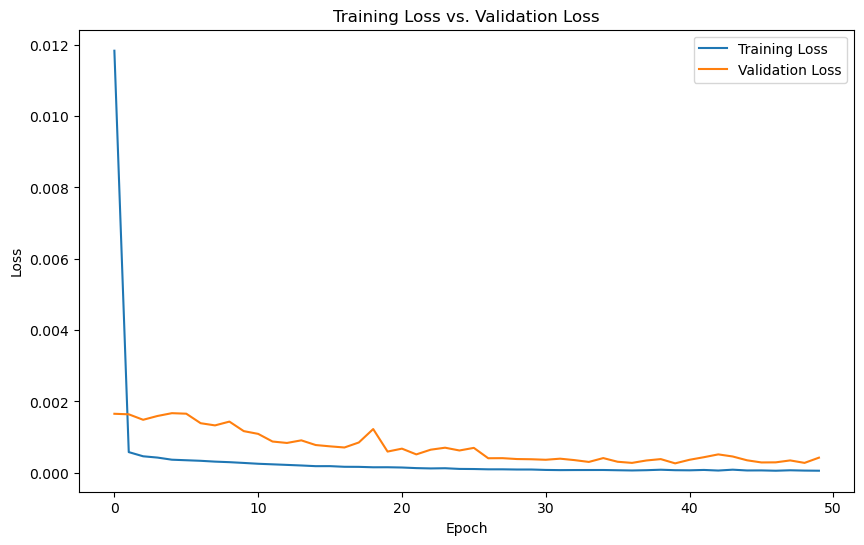

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

train_pred_actual = scaler.inverse_transform(train_pred)
train_actual = scaler.inverse_transform(y_train)
test_pred_actual = scaler.inverse_transform(test_pred)
test_actual = scaler.inverse_transform(y_test)

train_rmse = sqrt(mean_squared_error(train_actual, train_pred_actual))
train_mae = mean_absolute_error(train_actual, train_pred_actual)
train_mape = np.mean(np.abs((train_actual - train_pred_actual) / train_actual)) * 100

test_rmse = sqrt(mean_squared_error(test_actual, test_pred_actual))
test_mae = mean_absolute_error(test_actual, test_pred_actual)
test_mape = np.mean(np.abs((test_actual - test_pred_actual) / test_actual)) * 100

print('Train RMSE:', train_rmse)
print('Train MAE:', train_mae)
print('Train MAPE:', train_mape)
print('Test RMSE:', test_rmse)
print('Test MAE:', test_mae)
print('Test MAPE:', test_mape)

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
Train RMSE: 1.0113251440376738
Train MAE: 0.6944115654055316
Train MAPE: 2.138550550266202
Test RMSE: 1.5139941085530557
Test MAE: 1.1092244379052287
Test MAPE: 2.5783650243484284


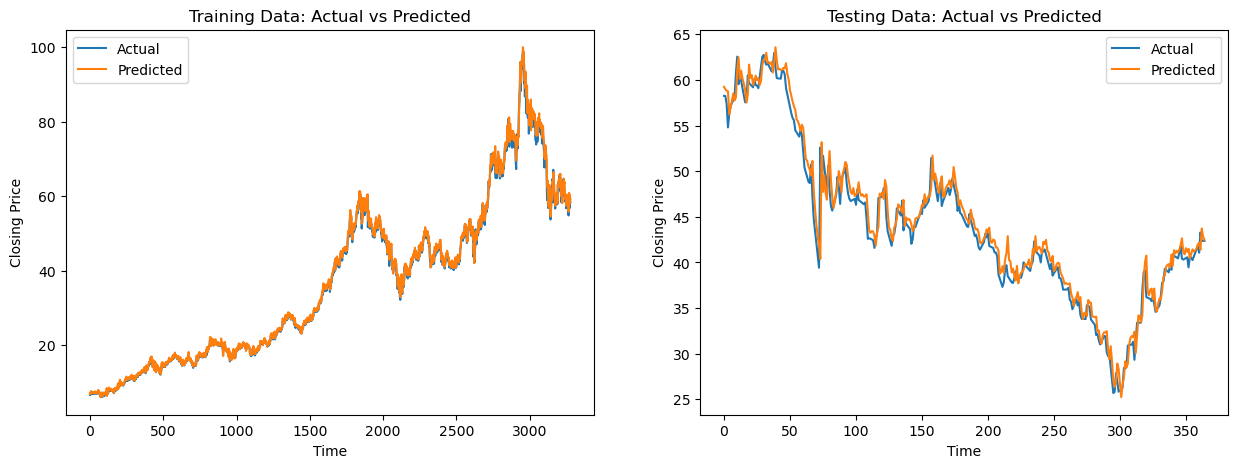

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(train_actual, label='Actual')
plt.plot(train_pred_actual, label='Predicted')
plt.title('Training Data: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()

plt.subplot(1,2,2)
plt.plot(test_actual, label='Actual')
plt.plot(test_pred_actual, label='Predicted')
plt.title('Testing Data: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()

plt.show()

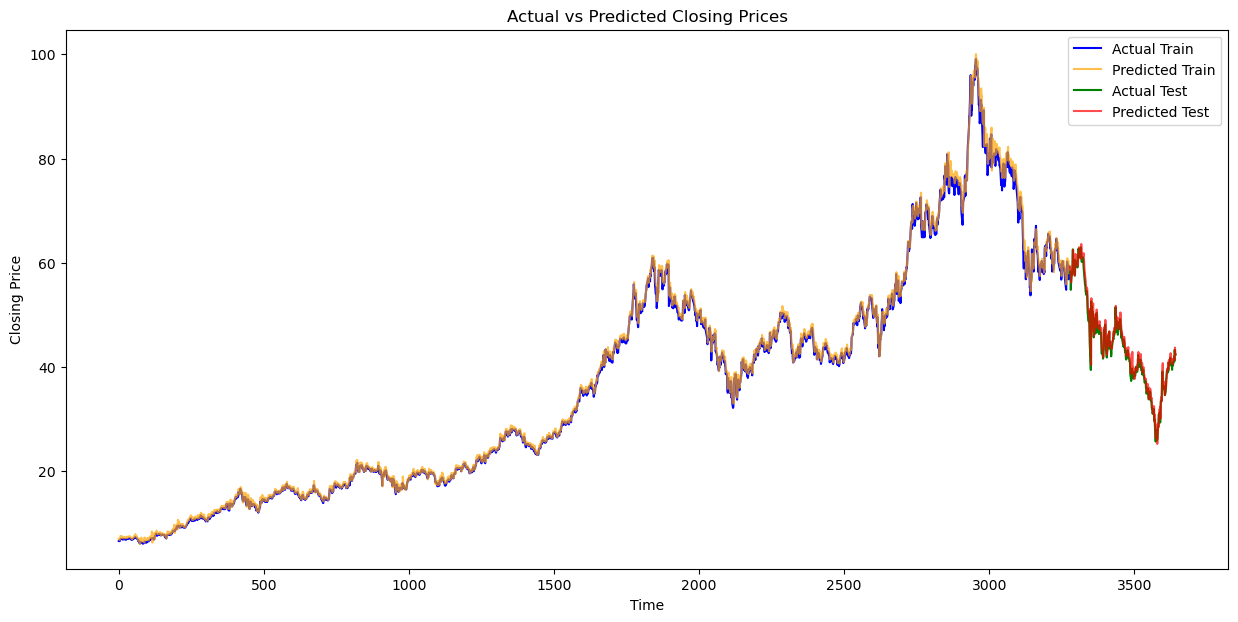

In [ ]:
import matplotlib.pyplot as plt

train_time = range(len(train_actual))
test_time = range(len(train_actual), len(train_actual) + len(test_actual))

plt.figure(figsize=(15, 7))
plt.plot(train_time, train_actual, label='Actual Train', color='blue')
plt.plot(train_time, train_pred_actual, label='Predicted Train', color='orange', alpha=0.7)
plt.plot(test_time, test_actual, label='Actual Test', color='green')
plt.plot(test_time, test_pred_actual, label='Predicted Test', color='red', alpha=0.7)

plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# LSTM Model

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import yfinance as yf

ticker_symbol = 'TCEHY'

tencent_data = yf.download(ticker_symbol, start='2013-01-01', end='2023-01-01')

print(tencent_data.head())

[*********************100%%**********************]  1 of 1 completed

             Open   High    Low  Close  Adj Close  Volume
Date                                                     
2013-01-02  6.674  6.730  6.672  6.720   6.169181  362500
2013-01-03  6.734  6.734  6.660  6.660   6.114100  355000
2013-01-04  6.658  6.742  6.652  6.694   6.145313  101000
2013-01-07  6.590  6.600  6.556  6.600   6.059018   83000
2013-01-08  6.592  6.592  6.540  6.570   6.031476   49000


In [ ]:
tencent_data.reset_index(inplace=True)

print(tencent_data.head())

        Date   Open   High    Low  Close  Adj Close  Volume
0 2013-01-02  6.674  6.730  6.672  6.720   6.169181  362500
1 2013-01-03  6.734  6.734  6.660  6.660   6.114100  355000
2 2013-01-04  6.658  6.742  6.652  6.694   6.145313  101000
3 2013-01-07  6.590  6.600  6.556  6.600   6.059018   83000
4 2013-01-08  6.592  6.592  6.540  6.570   6.031476   49000


In [ ]:
tencent_data['Date'] = pd.to_datetime(tencent_data['Date'])
tencent_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,6.674000,6.730000,6.672000,6.720000,6.169181,362500
1,2013-01-03,6.734000,6.734000,6.660000,6.660000,6.114100,355000
2,2013-01-04,6.658000,6.742000,6.652000,6.694000,6.145313,101000
3,2013-01-07,6.590000,6.600000,6.556000,6.600000,6.059018,83000
4,2013-01-08,6.592000,6.592000,6.540000,6.570000,6.031476,49000
...,...,...,...,...,...,...,...
2513,2022-12-23,40.689999,40.880001,40.049999,40.259998,37.953487,1836800
2514,2022-12-27,40.130001,42.169998,40.000000,41.830002,39.433544,4433500
2515,2022-12-28,41.779999,42.349998,40.770000,41.070000,38.717087,5272400
2516,2022-12-29,43.070000,43.619999,42.759998,43.290001,40.809898,4546700


In [ ]:
date_range_start = '2013-01-01'
date_range_end = '2023-01-01'
full_date_range = pd.date_range(start=date_range_start, end=date_range_end)
date_range_df = pd.DataFrame(full_date_range, columns=['Date'])
tencent_merged = pd.merge(date_range_df, tencent_data, on='Date', how='left')
tencent_merged

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-02,6.674000,6.730000,6.672000,6.720000,6.169181,362500.0
2,2013-01-03,6.734000,6.734000,6.660000,6.660000,6.114100,355000.0
3,2013-01-04,6.658000,6.742000,6.652000,6.694000,6.145313,101000.0
4,2013-01-05,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3648,2022-12-28,41.779999,42.349998,40.770000,41.070000,38.717087,5272400.0
3649,2022-12-29,43.070000,43.619999,42.759998,43.290001,40.809898,4546700.0
3650,2022-12-30,42.040001,42.919998,42.040001,42.360001,39.933178,1505500.0
3651,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
financial_metrics = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
for metric in financial_metrics:
    tencent_merged[metric].interpolate(method='linear', inplace=True)

tencent_merged.bfill(inplace=True)
tencent_merged

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,6.674000,6.730000,6.672000,6.720000,6.169181,362500.0
1,2013-01-02,6.674000,6.730000,6.672000,6.720000,6.169181,362500.0
2,2013-01-03,6.734000,6.734000,6.660000,6.660000,6.114100,355000.0
3,2013-01-04,6.658000,6.742000,6.652000,6.694000,6.145313,101000.0
4,2013-01-05,6.635333,6.694667,6.620000,6.662666,6.116548,95000.0
...,...,...,...,...,...,...,...
3648,2022-12-28,41.779999,42.349998,40.770000,41.070000,38.717087,5272400.0
3649,2022-12-29,43.070000,43.619999,42.759998,43.290001,40.809898,4546700.0
3650,2022-12-30,42.040001,42.919998,42.040001,42.360001,39.933178,1505500.0
3651,2022-12-31,42.040001,42.919998,42.040001,42.360001,39.933178,1505500.0


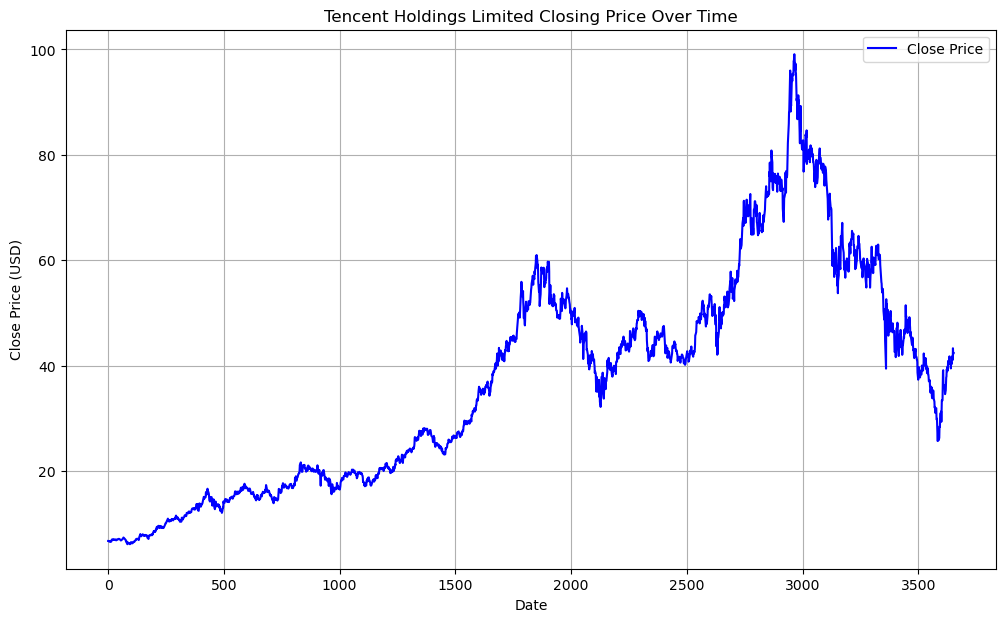

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 7))
plt.plot(tencent_merged['Close'], label='Close Price', color='blue')
plt.title('Tencent Holdings Limited Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# # Calculate Turnover
# tencent_merged['Turnover'] = (tencent_merged['High'] + tencent_merged['Low']) / 2 * tencent_merged['Volume']

# Calculate Daily Change and Percentage Change
tencent_merged['Ups and downs'] = tencent_merged['Close'].diff()
tencent_merged['Percentage Change'] = tencent_merged['Close'].pct_change()
# # tencent_merged['Percentage Change'] = tencent_merged['Daily Change'] / tencent_merged['Close'].shift(1) * 100

# # Calculate Ups and Downs
# tencent_merged['Ups'] = tencent_merged['Daily Change'].apply(lambda x: 1 if x > 0 else 0)
# tencent_merged['Downs'] = tencent_merged['Daily Change'].apply(lambda x: 1 if x < 0 else 0)

# # Display the updated DataFrame
tencent_merged

,Date,Open,High,Low,Close,Adj Close,Volume,Ups and downs,Percentage Change
0,2013-01-01,6.674000,6.730000,6.672000,6.720000,6.169181,362500.0,NaN,NaN
1,2013-01-02,6.674000,6.730000,6.672000,6.720000,6.169181,362500.0,0.000000,0.000000
2,2013-01-03,6.734000,6.734000,6.660000,6.660000,6.114100,355000.0,-0.060000,-0.008929
3,2013-01-04,6.658000,6.742000,6.652000,6.694000,6.145313,101000.0,0.034000,0.005105
4,2013-01-05,6.635333,6.694667,6.620000,6.662666,6.116548,95000.0,-0.031333,-0.004681
...,...,...,...,...,...,...,...,...,...
3648,2022-12-28,41.779999,42.349998,40.770000,41.070000,38.717087,5272400.0,-0.760002,-0.018169
3649,2022-12-29,43.070000,43.619999,42.759998,43.290001,40.809898,4546700.0,2.220001,0.054054
3650,2022-12-30,42.040001,42.919998,42.040001,42.360001,39.933178,1505500.0,-0.930000,-0.021483
3651,2022-12-31,42.040001,42.919998,42.040001,42.360001,39.933178,1505500.0,0.000000,0.000000


In [ ]:
columns = ['Ups and downs','Percentage Change']

for column in columns:
    tencent_merged[column].interpolate(method='linear', inplace=True)
tencent_merged.bfill(inplace=True)
tencent_merged

,Date,Open,High,Low,Close,Adj Close,Volume,Ups and downs,Percentage Change
0,2013-01-01,6.674000,6.730000,6.672000,6.720000,6.169181,362500.0,0.000000,0.000000
1,2013-01-02,6.674000,6.730000,6.672000,6.720000,6.169181,362500.0,0.000000,0.000000
2,2013-01-03,6.734000,6.734000,6.660000,6.660000,6.114100,355000.0,-0.060000,-0.008929
3,2013-01-04,6.658000,6.742000,6.652000,6.694000,6.145313,101000.0,0.034000,0.005105
4,2013-01-05,6.635333,6.694667,6.620000,6.662666,6.116548,95000.0,-0.031333,-0.004681
...,...,...,...,...,...,...,...,...,...
3648,2022-12-28,41.779999,42.349998,40.770000,41.070000,38.717087,5272400.0,-0.760002,-0.018169
3649,2022-12-29,43.070000,43.619999,42.759998,43.290001,40.809898,4546700.0,2.220001,0.054054
3650,2022-12-30,42.040001,42.919998,42.040001,42.360001,39.933178,1505500.0,-0.930000,-0.021483
3651,2022-12-31,42.040001,42.919998,42.040001,42.360001,39.933178,1505500.0,0.000000,0.000000


In [ ]:
# # Moving Averages
# tencent_merged['MA10'] = tencent_merged['Close'].rolling(window=10).mean()
# tencent_merged['MA50'] = tencent_merged['Close'].rolling(window=50).mean()


# # Exponential Moving Averages
# tencent_merged['EMA12'] = tencent_merged['Close'].ewm(span=12, adjust=False).mean()
# tencent_merged['EMA26'] = tencent_merged['Close'].ewm(span=26, adjust=False).mean()

# # # Calculate MACD
# # tencent_merged['MACD'] = tencent_merged['EMA12'] - tencent_merged['EMA26']
# # tencent_merged['Signal_Line'] = tencent_merged['MACD'].ewm(span=9, adjust=False).mean()

# # # RSI Calculation
# # delta = tencent_merged['Close'].diff(1)
# # gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
# # loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
# # RS = gain / loss
# # tencent_merged['RSI'] = 100 - (100 / (1 + RS))
# tencent_merged

In [ ]:
# columns = ['MA10','MA50','EMA12','EMA26']

# for column in columns:
#     tencent_merged[column].interpolate(method='linear', inplace=True)
# tencent_merged.bfill(inplace=True)
# tencent_merged

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

features = tencent_merged.drop(['Date','Adj Close'], axis=1)
target = tencent_merged['Close']

In [ ]:
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)
target_scaled = scaler.fit_transform(target.values.reshape(-1,1))
features_scaled.shape, target_scaled.shape

((3653, 7), (3653, 1))

In [ ]:
def create_dataset(X, y, time_steps):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10
X, y = create_dataset(features_scaled, target_scaled, time_steps)

In [ ]:
X.shape, y.shape

((3643, 10, 7), (3643, 1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3278, 10, 7)
(365, 10, 7)
(3278, 1)
(365, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

model = Sequential()

model.add(LSTM(units=64, activation='tanh', input_shape=(X_train.shape[1],X_train.shape[2]), return_sequences=False))
model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mse' , metrics=['mean_absolute_error'])
model.summary()

C:\Users\Timch\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          18,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,497 (72.25 KB)

 Trainable params: 18,497 (72.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=2, validation_split=0.1)

Epoch 1/50
47/47 - 2s - 48ms/step - loss: 0.0135 - mean_absolute_error: 0.0718 - val_loss: 7.2570e-04 - val_mean_absolute_error: 0.0218
Epoch 2/50
47/47 - 0s - 4ms/step - loss: 2.5821e-04 - mean_absolute_error: 0.0113 - val_loss: 5.9735e-04 - val_mean_absolute_error: 0.0198
Epoch 3/50
47/47 - 0s - 4ms/step - loss: 1.6363e-04 - mean_absolute_error: 0.0084 - val_loss: 5.5171e-04 - val_mean_absolute_error: 0.0194
Epoch 4/50
47/47 - 0s - 4ms/step - loss: 1.4298e-04 - mean_absolute_error: 0.0079 - val_loss: 5.0080e-04 - val_mean_absolute_error: 0.0186
Epoch 5/50
47/47 - 0s - 4ms/step - loss: 1.3252e-04 - mean_absolute_error: 0.0077 - val_loss: 5.1079e-04 - val_mean_absolute_error: 0.0188
Epoch 6/50
47/47 - 0s - 4ms/step - loss: 1.3268e-04 - mean_absolute_error: 0.0076 - val_loss: 4.5119e-04 - val_mean_absolute_error: 0.0173
Epoch 7/50
47/47 - 0s - 4ms/step - loss: 1.2857e-04 - mean_absolute_error: 0.0073 - val_loss: 4.3934e-04 - val_mean_absolute_error: 0.0172
Epoch 8/50
47/47 - 0s - 4ms/st

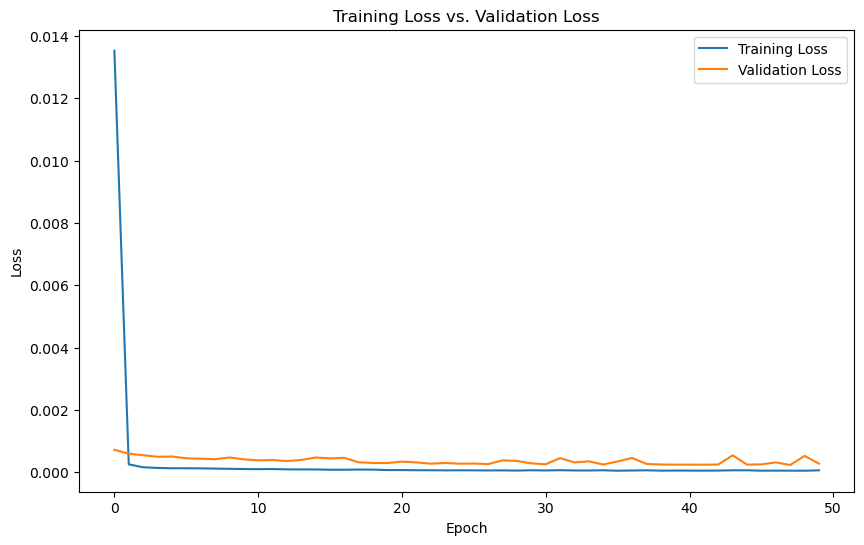

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

train_pred_actual = scaler.inverse_transform(train_pred)
train_actual = scaler.inverse_transform(y_train)
test_pred_actual = scaler.inverse_transform(test_pred)
test_actual = scaler.inverse_transform(y_test)

train_rmse = sqrt(mean_squared_error(train_actual, train_pred_actual))
train_mae = mean_absolute_error(train_actual, train_pred_actual)
train_mape = np.mean(np.abs((train_actual - train_pred_actual) / train_actual)) * 100

test_rmse = sqrt(mean_squared_error(test_actual, test_pred_actual))
test_mae = mean_absolute_error(test_actual, test_pred_actual)
test_mape = np.mean(np.abs((test_actual - test_pred_actual) / test_actual)) * 100

print('Train RMSE:', train_rmse)
print('Train MAE:', train_mae)
print('Train MAPE:', train_mape)
print('Test RMSE:', test_rmse)
print('Test MAE:', test_mae)
print('Test MAPE:', test_mape)

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Train RMSE: 0.8503494055594515
Train MAE: 0.5405474900956898
Train MAPE: 1.5058494504387245
Test RMSE: 1.4230566444717452
Test MAE: 1.0276184151706085
Test MAPE: 2.394507689725628


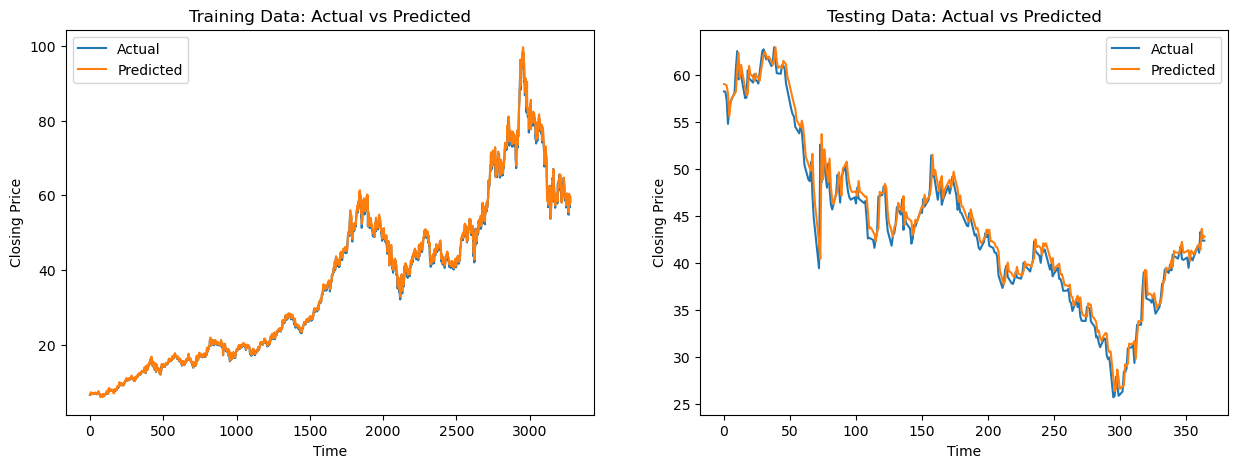

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(train_actual, label='Actual')
plt.plot(train_pred_actual, label='Predicted')
plt.title('Training Data: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()

plt.subplot(1,2,2)
plt.plot(test_actual, label='Actual')
plt.plot(test_pred_actual, label='Predicted')
plt.title('Testing Data: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()

plt.show()

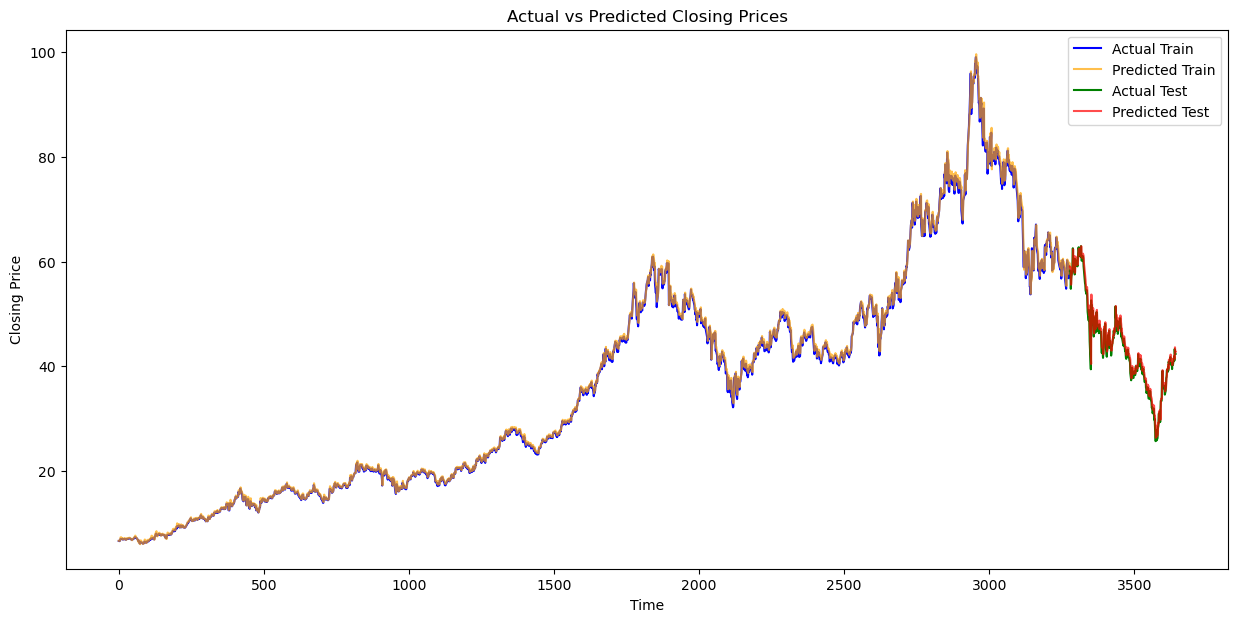

In [ ]:
import matplotlib.pyplot as plt

train_time = range(len(train_actual))
test_time = range(len(train_actual), len(train_actual) + len(test_actual))

plt.figure(figsize=(15, 7))
plt.plot(train_time, train_actual, label='Actual Train', color='blue')
plt.plot(train_time, train_pred_actual, label='Predicted Train', color='orange', alpha=0.7)
plt.plot(test_time, test_actual, label='Actual Test', color='green')
plt.plot(test_time, test_pred_actual, label='Predicted Test', color='red', alpha=0.7)

plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# CNN-LSTM Model

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import yfinance as yf

ticker_symbol = 'TCEHY'

tencent_data = yf.download(ticker_symbol, start='2013-01-01', end='2023-01-01')

print(tencent_data.head())

[*********************100%%**********************]  1 of 1 completed

             Open   High    Low  Close  Adj Close  Volume
Date                                                     
2013-01-02  6.674  6.730  6.672  6.720   6.169181  362500
2013-01-03  6.734  6.734  6.660  6.660   6.114100  355000
2013-01-04  6.658  6.742  6.652  6.694   6.145313  101000
2013-01-07  6.590  6.600  6.556  6.600   6.059018   83000
2013-01-08  6.592  6.592  6.540  6.570   6.031476   49000


In [ ]:
tencent_data.reset_index(inplace=True)

print(tencent_data.head())

        Date   Open   High    Low  Close  Adj Close  Volume
0 2013-01-02  6.674  6.730  6.672  6.720   6.169181  362500
1 2013-01-03  6.734  6.734  6.660  6.660   6.114100  355000
2 2013-01-04  6.658  6.742  6.652  6.694   6.145313  101000
3 2013-01-07  6.590  6.600  6.556  6.600   6.059018   83000
4 2013-01-08  6.592  6.592  6.540  6.570   6.031476   49000


In [ ]:
tencent_data['Date'] = pd.to_datetime(tencent_data['Date'])
tencent_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,6.674000,6.730000,6.672000,6.720000,6.169181,362500
1,2013-01-03,6.734000,6.734000,6.660000,6.660000,6.114100,355000
2,2013-01-04,6.658000,6.742000,6.652000,6.694000,6.145313,101000
3,2013-01-07,6.590000,6.600000,6.556000,6.600000,6.059018,83000
4,2013-01-08,6.592000,6.592000,6.540000,6.570000,6.031476,49000
...,...,...,...,...,...,...,...
2513,2022-12-23,40.689999,40.880001,40.049999,40.259998,37.953487,1836800
2514,2022-12-27,40.130001,42.169998,40.000000,41.830002,39.433544,4433500
2515,2022-12-28,41.779999,42.349998,40.770000,41.070000,38.717087,5272400
2516,2022-12-29,43.070000,43.619999,42.759998,43.290001,40.809898,4546700


In [ ]:
date_range_start = '2013-01-01'
date_range_end = '2023-01-01'
full_date_range = pd.date_range(start=date_range_start, end=date_range_end)
date_range_df = pd.DataFrame(full_date_range, columns=['Date'])
tencent_merged = pd.merge(date_range_df, tencent_data, on='Date', how='left')
tencent_merged

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-02,6.674000,6.730000,6.672000,6.720000,6.169181,362500.0
2,2013-01-03,6.734000,6.734000,6.660000,6.660000,6.114100,355000.0
3,2013-01-04,6.658000,6.742000,6.652000,6.694000,6.145313,101000.0
4,2013-01-05,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3648,2022-12-28,41.779999,42.349998,40.770000,41.070000,38.717087,5272400.0
3649,2022-12-29,43.070000,43.619999,42.759998,43.290001,40.809898,4546700.0
3650,2022-12-30,42.040001,42.919998,42.040001,42.360001,39.933178,1505500.0
3651,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
financial_metrics = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
for metric in financial_metrics:
    tencent_merged[metric].interpolate(method='linear', inplace=True)

tencent_merged.bfill(inplace=True)
tencent_merged

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,6.674000,6.730000,6.672000,6.720000,6.169181,362500.0
1,2013-01-02,6.674000,6.730000,6.672000,6.720000,6.169181,362500.0
2,2013-01-03,6.734000,6.734000,6.660000,6.660000,6.114100,355000.0
3,2013-01-04,6.658000,6.742000,6.652000,6.694000,6.145313,101000.0
4,2013-01-05,6.635333,6.694667,6.620000,6.662666,6.116548,95000.0
...,...,...,...,...,...,...,...
3648,2022-12-28,41.779999,42.349998,40.770000,41.070000,38.717087,5272400.0
3649,2022-12-29,43.070000,43.619999,42.759998,43.290001,40.809898,4546700.0
3650,2022-12-30,42.040001,42.919998,42.040001,42.360001,39.933178,1505500.0
3651,2022-12-31,42.040001,42.919998,42.040001,42.360001,39.933178,1505500.0


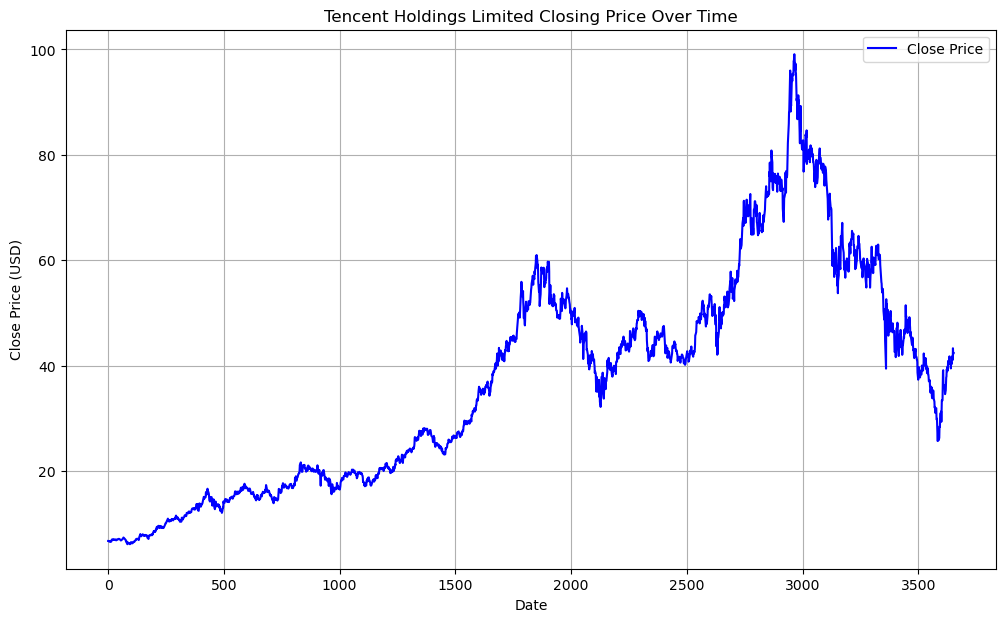

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 7))
plt.plot(tencent_merged['Close'], label='Close Price', color='blue')
plt.title('Tencent Holdings Limited Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# # Calculate Turnover
# tencent_merged['Turnover'] = (tencent_merged['High'] + tencent_merged['Low']) / 2 * tencent_merged['Volume']

# Calculate Daily Change and Percentage Change
tencent_merged['Ups and downs'] = tencent_merged['Close'].diff()
tencent_merged['Percentage Change'] = tencent_merged['Close'].pct_change()
# # tencent_merged['Percentage Change'] = tencent_merged['Daily Change'] / tencent_merged['Close'].shift(1) * 100

# # Calculate Ups and Downs
# tencent_merged['Ups'] = tencent_merged['Daily Change'].apply(lambda x: 1 if x > 0 else 0)
# tencent_merged['Downs'] = tencent_merged['Daily Change'].apply(lambda x: 1 if x < 0 else 0)

# # Display the updated DataFrame
tencent_merged

,Date,Open,High,Low,Close,Adj Close,Volume,Ups and downs,Percentage Change
0,2013-01-01,6.674000,6.730000,6.672000,6.720000,6.169181,362500.0,NaN,NaN
1,2013-01-02,6.674000,6.730000,6.672000,6.720000,6.169181,362500.0,0.000000,0.000000
2,2013-01-03,6.734000,6.734000,6.660000,6.660000,6.114100,355000.0,-0.060000,-0.008929
3,2013-01-04,6.658000,6.742000,6.652000,6.694000,6.145313,101000.0,0.034000,0.005105
4,2013-01-05,6.635333,6.694667,6.620000,6.662666,6.116548,95000.0,-0.031333,-0.004681
...,...,...,...,...,...,...,...,...,...
3648,2022-12-28,41.779999,42.349998,40.770000,41.070000,38.717087,5272400.0,-0.760002,-0.018169
3649,2022-12-29,43.070000,43.619999,42.759998,43.290001,40.809898,4546700.0,2.220001,0.054054
3650,2022-12-30,42.040001,42.919998,42.040001,42.360001,39.933178,1505500.0,-0.930000,-0.021483
3651,2022-12-31,42.040001,42.919998,42.040001,42.360001,39.933178,1505500.0,0.000000,0.000000


In [ ]:
columns = ['Ups and downs','Percentage Change']

for column in columns:
    tencent_merged[column].interpolate(method='linear', inplace=True)
tencent_merged.bfill(inplace=True)
tencent_merged

,Date,Open,High,Low,Close,Adj Close,Volume,Ups and downs,Percentage Change
0,2013-01-01,6.674000,6.730000,6.672000,6.720000,6.169181,362500.0,0.000000,0.000000
1,2013-01-02,6.674000,6.730000,6.672000,6.720000,6.169181,362500.0,0.000000,0.000000
2,2013-01-03,6.734000,6.734000,6.660000,6.660000,6.114100,355000.0,-0.060000,-0.008929
3,2013-01-04,6.658000,6.742000,6.652000,6.694000,6.145313,101000.0,0.034000,0.005105
4,2013-01-05,6.635333,6.694667,6.620000,6.662666,6.116548,95000.0,-0.031333,-0.004681
...,...,...,...,...,...,...,...,...,...
3648,2022-12-28,41.779999,42.349998,40.770000,41.070000,38.717087,5272400.0,-0.760002,-0.018169
3649,2022-12-29,43.070000,43.619999,42.759998,43.290001,40.809898,4546700.0,2.220001,0.054054
3650,2022-12-30,42.040001,42.919998,42.040001,42.360001,39.933178,1505500.0,-0.930000,-0.021483
3651,2022-12-31,42.040001,42.919998,42.040001,42.360001,39.933178,1505500.0,0.000000,0.000000


In [ ]:
# # Moving Averages
# tencent_merged['MA10'] = tencent_merged['Close'].rolling(window=10).mean()
# tencent_merged['MA50'] = tencent_merged['Close'].rolling(window=50).mean()


# # Exponential Moving Averages
# tencent_merged['EMA12'] = tencent_merged['Close'].ewm(span=12, adjust=False).mean()
# tencent_merged['EMA26'] = tencent_merged['Close'].ewm(span=26, adjust=False).mean()

# # # Calculate MACD
# # tencent_merged['MACD'] = tencent_merged['EMA12'] - tencent_merged['EMA26']
# # tencent_merged['Signal_Line'] = tencent_merged['MACD'].ewm(span=9, adjust=False).mean()

# # # RSI Calculation
# # delta = tencent_merged['Close'].diff(1)
# # gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
# # loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
# # RS = gain / loss
# # tencent_merged['RSI'] = 100 - (100 / (1 + RS))
# tencent_merged

In [ ]:
# columns = ['MA10','MA50','EMA12','EMA26']

# for column in columns:
#     tencent_merged[column].interpolate(method='linear', inplace=True)
# tencent_merged.bfill(inplace=True)
# tencent_merged

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

features = tencent_merged.drop(['Date','Adj Close'], axis=1)
target = tencent_merged['Close']

In [ ]:
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)
target_scaled = scaler.fit_transform(target.values.reshape(-1,1))
features_scaled.shape, target_scaled.shape

((3653, 7), (3653, 1))

In [ ]:
def create_dataset(X, y, time_steps):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10
X, y = create_dataset(features_scaled, target_scaled, time_steps)

In [ ]:
X.shape, y.shape

((3643, 10, 7), (3643, 1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3278, 10, 7)
(365, 10, 7)
(3278, 1)
(365, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, Dropout, BatchNormalization, Bidirectional, TimeDistributed, Flatten

model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1],X_train.shape[2]), padding='same'))
model.add(MaxPooling1D(pool_size=1, padding='same'))

# model.add((Flatten()))

# model.add(BatchNormalization())
# model.add(MaxPooling1D(pool_size=1, padding='same'))
model.add(LSTM(units=64, return_sequences=False, activation='tanh'))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mean_absolute_error'])

# Model summary to see the architecture
model.summary()

C:\Users\Timch\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)                    │ (None, 10, 32)              │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 10, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,601 (100.00 KB)

 Trainable params: 25,601 (100.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=2, validation_split=0.1)

Epoch 1/50
47/47 - 3s - 65ms/step - loss: 0.0144 - mean_absolute_error: 0.0704 - val_loss: 0.0020 - val_mean_absolute_error: 0.0385
Epoch 2/50
47/47 - 0s - 6ms/step - loss: 3.1361e-04 - mean_absolute_error: 0.0128 - val_loss: 6.1544e-04 - val_mean_absolute_error: 0.0203
Epoch 3/50
47/47 - 0s - 6ms/step - loss: 1.8376e-04 - mean_absolute_error: 0.0093 - val_loss: 5.2344e-04 - val_mean_absolute_error: 0.0185
Epoch 4/50
47/47 - 0s - 8ms/step - loss: 1.6080e-04 - mean_absolute_error: 0.0078 - val_loss: 4.9370e-04 - val_mean_absolute_error: 0.0182
Epoch 5/50
47/47 - 0s - 7ms/step - loss: 1.4255e-04 - mean_absolute_error: 0.0077 - val_loss: 4.6984e-04 - val_mean_absolute_error: 0.0178
Epoch 6/50
47/47 - 0s - 6ms/step - loss: 1.2564e-04 - mean_absolute_error: 0.0071 - val_loss: 5.2531e-04 - val_mean_absolute_error: 0.0190
Epoch 7/50
47/47 - 0s - 6ms/step - loss: 1.2432e-04 - mean_absolute_error: 0.0070 - val_loss: 6.6705e-04 - val_mean_absolute_error: 0.0217
Epoch 8/50
47/47 - 0s - 6ms/step -

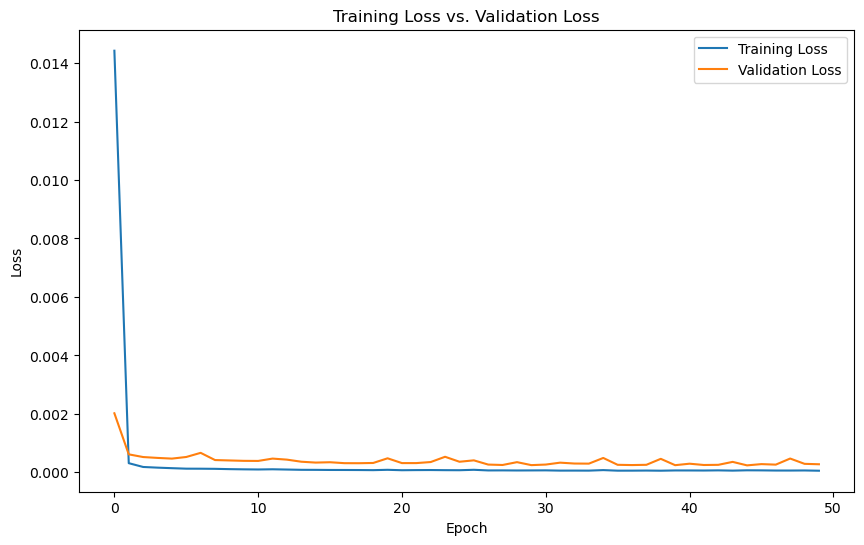

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

train_pred_actual = scaler.inverse_transform(train_pred)
train_actual = scaler.inverse_transform(y_train)
test_pred_actual = scaler.inverse_transform(test_pred)
test_actual = scaler.inverse_transform(y_test)

train_rmse = sqrt(mean_squared_error(train_actual, train_pred_actual))
train_mae = mean_absolute_error(train_actual, train_pred_actual)
train_mape = np.mean(np.abs((train_actual - train_pred_actual) / train_actual)) * 100

test_rmse = sqrt(mean_squared_error(test_actual, test_pred_actual))
test_mae = mean_absolute_error(test_actual, test_pred_actual)
test_mape = np.mean(np.abs((test_actual - test_pred_actual) / test_actual)) * 100

print('Train RMSE:', train_rmse)
print('Train MAE:', train_mae)
print('Train MAPE:', train_mape)
print('Test RMSE:', test_rmse)
print('Test MAE:', test_mae)
print('Test MAPE:', test_mape)

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Train RMSE: 0.8404224770268136
Train MAE: 0.5165669107330458
Train MAPE: 1.3506345278326868
Test RMSE: 1.3427699287836488
Test MAE: 0.9415031781479646
Test MAPE: 2.1979519402337138


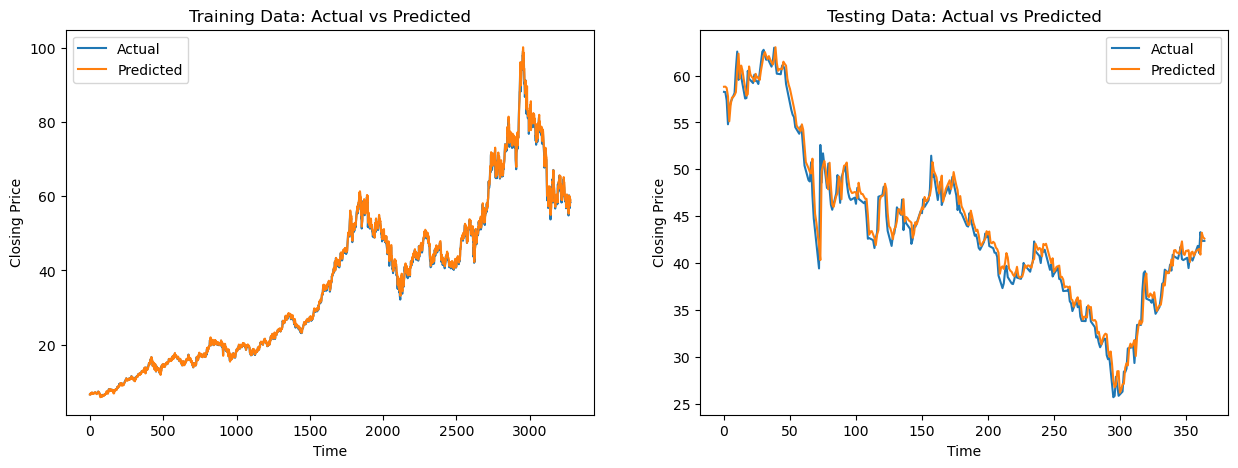

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(train_actual, label='Actual')
plt.plot(train_pred_actual, label='Predicted')
plt.title('Training Data: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()

plt.subplot(1,2,2)
plt.plot(test_actual, label='Actual')
plt.plot(test_pred_actual, label='Predicted')
plt.title('Testing Data: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()

plt.show()

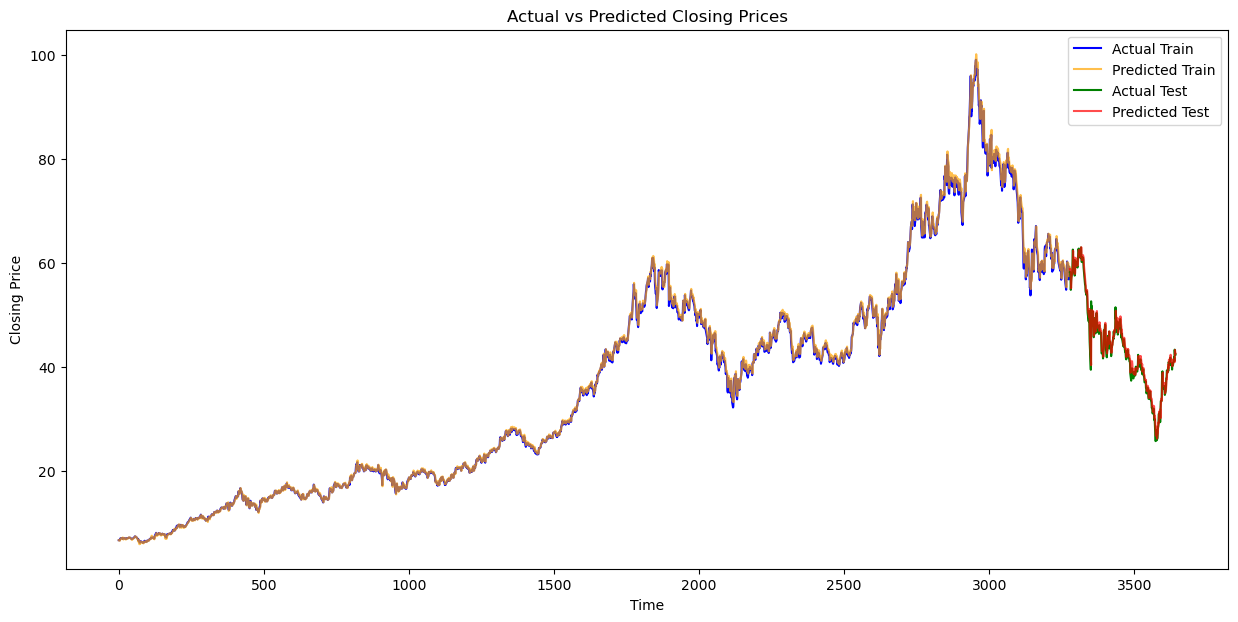

In [ ]:
import matplotlib.pyplot as plt

train_time = range(len(train_actual))
test_time = range(len(train_actual), len(train_actual) + len(test_actual))

plt.figure(figsize=(15, 7))
plt.plot(train_time, train_actual, label='Actual Train', color='blue')
plt.plot(train_time, train_pred_actual, label='Predicted Train', color='orange', alpha=0.7)
plt.plot(test_time, test_actual, label='Actual Test', color='green')
plt.plot(test_time, test_pred_actual, label='Predicted Test', color='red', alpha=0.7)

plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()